In [50]:
%config IPCompleter.greedy=True

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Exercise 12

In [52]:
credit_df = pd.read_csv('./data/Credit.csv')
credit_df.drop('Unnamed: 0', axis=1, inplace=True)

In [53]:
col_names = ['Married', 'Ethnicity', 'Gender', 'Student']

for col in col_names:
    try:
        dummies = pd.get_dummies(credit_df[col], prefix=col)
        credit_df.drop(col, axis=1, inplace=True)
        credit_df = pd.concat([credit_df, dummies], axis=1)
    except KeyError as error:
        print('Column {name} does not exist!'.format(name=col))

In [54]:
credit_df

,Income,Limit,Rating,Cards,Age,Education,Balance,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Gender_Male,Student_No,Student_Yes
0,14.891,3606,283,2,34,11,333,0,1,0,0,1,0,1,1,0
1,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0,0,1
2,104.593,7075,514,4,71,11,580,1,0,0,1,0,0,1,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0,1,0,1,0
4,55.882,4897,357,2,68,16,331,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,0,1,0,0,1,0,1,1,0
396,13.364,3838,296,5,65,17,480,1,0,1,0,0,0,1,1,0
397,57.872,4171,321,5,67,12,138,0,1,0,0,1,1,0,1,0
398,37.728,2525,192,1,44,13,0,0,1,0,0,1,0,1,1,0


## a) income > 50

In [55]:
income_df = credit_df.copy(deep=True)

In [56]:
income_df['Income > 50'] = income_df.apply(lambda row: 1 if row['Income'] > 50 else 0, axis=1)
income_df

,Income,Limit,Rating,Cards,Age,Education,Balance,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Gender_Male,Student_No,Student_Yes,Income > 50
0,14.891,3606,283,2,34,11,333,0,1,0,0,1,0,1,1,0,0
1,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0,0,1,1
2,104.593,7075,514,4,71,11,580,1,0,0,1,0,0,1,1,0,1
3,148.924,9504,681,3,36,11,964,1,0,0,1,0,1,0,1,0,1
4,55.882,4897,357,2,68,16,331,0,1,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,0,1,0,0,1,0,1,1,0,0
396,13.364,3838,296,5,65,17,480,1,0,1,0,0,0,1,1,0,0
397,57.872,4171,321,5,67,12,138,0,1,0,0,1,1,0,1,0,1
398,37.728,2525,192,1,44,13,0,0,1,0,0,1,0,1,1,0,0


In [57]:
income_features = list(income_df.columns)[:-1]
income_result = ['Income > 50']

In [58]:
X_income, y_income = income_df[income_features], income_df[income_result]

In [59]:
def split_dataset(df, feat, res):
    X = df[feat]
    y = df[res]
    return train_test_split(X, y, test_size=0.2, random_state=13)

In [60]:
X_income_train, X_income_test, y_income_train, y_income_test = split_dataset(income_df, income_features, income_result)

In [61]:
income_model = LogisticRegression(C=1e9, fit_intercept=False, solver='liblinear', penalty='l2', max_iter=10000)
income_model.fit(X_income_train, y_income_train.to_numpy().ravel())
income_model_acc = income_model.score(X_income_test, y_income_test.to_numpy().ravel())
income_model_acc

0.9875

## b) How many credit cards a person has?

In [62]:
cc_df = credit_df.copy(deep=True)

In [63]:
cc_features = list(cc_df)
cc_features.remove('Cards')
cc_result = ['Cards']

In [64]:
X_cc, y_cc = cc_df[cc_features], cc_df[cc_result]
X_cc_train, X_cc_test, y_cc_train, y_cc_test = split_dataset(cc_df, cc_features, cc_result)

In [65]:
cc_model = LogisticRegression(C=1e9, fit_intercept=False, solver='liblinear', max_iter=10000, multi_class='auto', penalty='l1')
cc_model.fit(X_cc_train, y_cc_train.to_numpy().ravel())
cc_model_acc = cc_model.score(X_cc_test, y_cc_test.to_numpy().ravel())
cc_model_acc

0.3625

# Exercise 13

## a) Income > 50

### KNN

In [66]:
def grid_search_cv(model, params, X, y, cv=10, verbose=10, jobs=-1):
    grid = GridSearchCV(model, params, scoring='accuracy', cv=cv, verbose=verbose, n_jobs=jobs, iid=True) # TODO: iid arg is deprecated
    grid.fit(X, y)
    return grid

In [67]:
income_knn_grid = grid_search_cv(KNeighborsClassifier(), {'n_neighbors': [1, 2, 4, 8, 20, 50]}, X_income, y_income.to_numpy().ravel())
income_best_knn_score = income_knn_grid.best_score_
income_knn_results = income_knn_grid.cv_results_
income_best_knn_estimator = income_knn_grid.best_estimator_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1980s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
/home/jakub/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [68]:
print(income_best_knn_score)
# print(income_knn_results)
# print(income_best_knn_estimator)

0.94


### Descision tree

In [69]:
income_dt_grid = grid_search_cv(DecisionTreeClassifier(), { 'max_depth': [1, 5, 10, 100] }, X_income, y_income.to_numpy().ravel())
income_best_dt_score = income_dt_grid.best_score_
income_dt_results = income_dt_grid.cv_results_
income_best_dt_estimator = income_dt_grid.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0214s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0309s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  20 out of  40 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
/home/jakub/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [70]:
print(income_best_dt_score)
# print(income_dt_results)
# print(income_best_dt_estimator)

1.0


## b) credit cards

### KNN

In [71]:
cc_knn_grid = grid_search_cv(KNeighborsClassifier(), { 'n_neighbors': [1, 2, 4, 8, 20, 50] }, X_cc, y_cc.to_numpy().ravel())

cc_best_knn_score = cc_knn_grid.best_score_
cc_knn_results = cc_knn_grid.cv_results_
cc_best_knn_estimator = cc_knn_grid.best_estimator_

/home/jakub/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0335s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0508s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
/home/jakub/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [72]:
print(cc_best_knn_score)
# print(cc_knn_results)
# print(cc_best_knn_estimator)

0.29


### Decision tree

In [73]:
cc_dt_grid = grid_search_cv(DecisionTreeClassifier(), { 'max_depth': [1, 5, 10, 100] }, X_cc, y_cc.to_numpy().ravel())
cc_best_dt_score = cc_dt_grid.best_score_
cc_dt_results = cc_dt_grid.cv_results_
cc_best_dt_estimator = cc_dt_grid.best_estimator_

/home/jakub/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0136s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0325s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  20 out of  40 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
/home/jakub/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [74]:
print(cc_best_dt_score)
# print(cc_dt_results)
# print(cc_best_dt_estimator)

0.2625


# Exercise 14

In [75]:
h = .02 # step size in the mesh
names = ['Logistic Regression', 'K Nearest Neighbors']
classifiers = [LogisticRegression(), KNeighborsClassifier()]

In [85]:
def draw_plot(df, ds, features, results):    
    figure = plt.figure(figsize=(30, 10))
    
    i = 1
    
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, len(classifiers) + 1, i)
    ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(1, len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

    plt.tight_layout()
    plt.show()

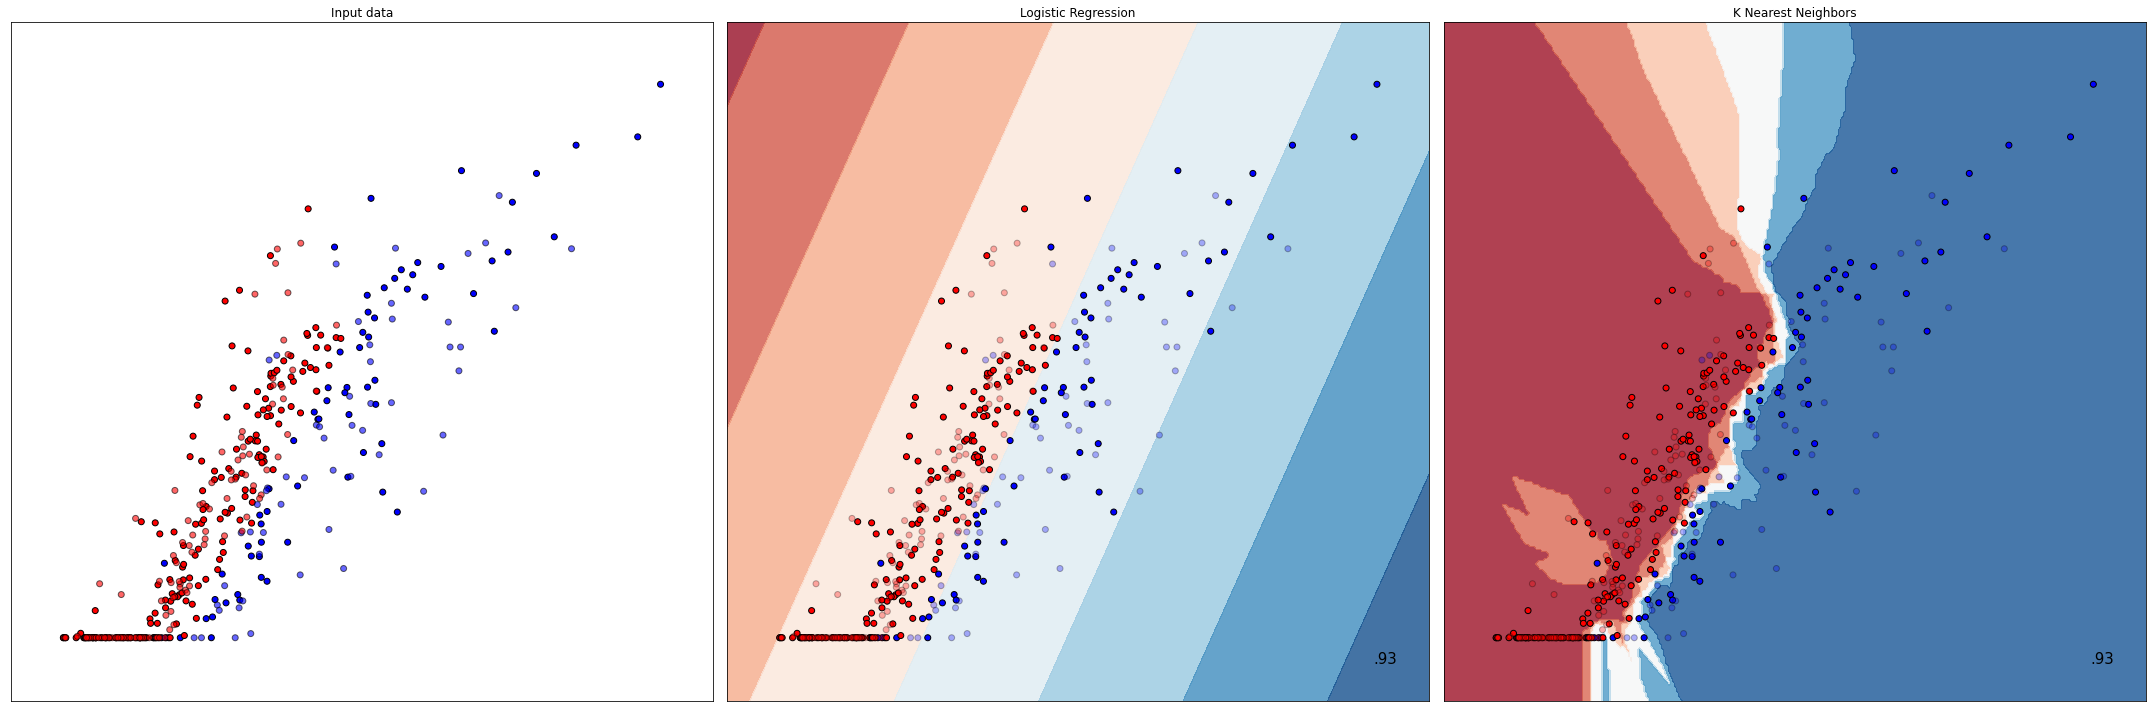

In [86]:
# income > 50
income_plot_df = income_df.copy(deep=True)
income_plot_features = ['Limit', 'Balance']
income_plot_results = ['Income > 50']

X_income_plot = income_plot_df[income_plot_features].to_numpy()
y_income_plot = income_plot_df[income_plot_results].to_numpy().ravel()

income_dataset = (X_income_plot, y_income_plot)
draw_plot(income_plot_df, income_dataset, income_plot_features, income_plot_results)

ValueError: cannot reshape array of size 805608 into shape (268,334)

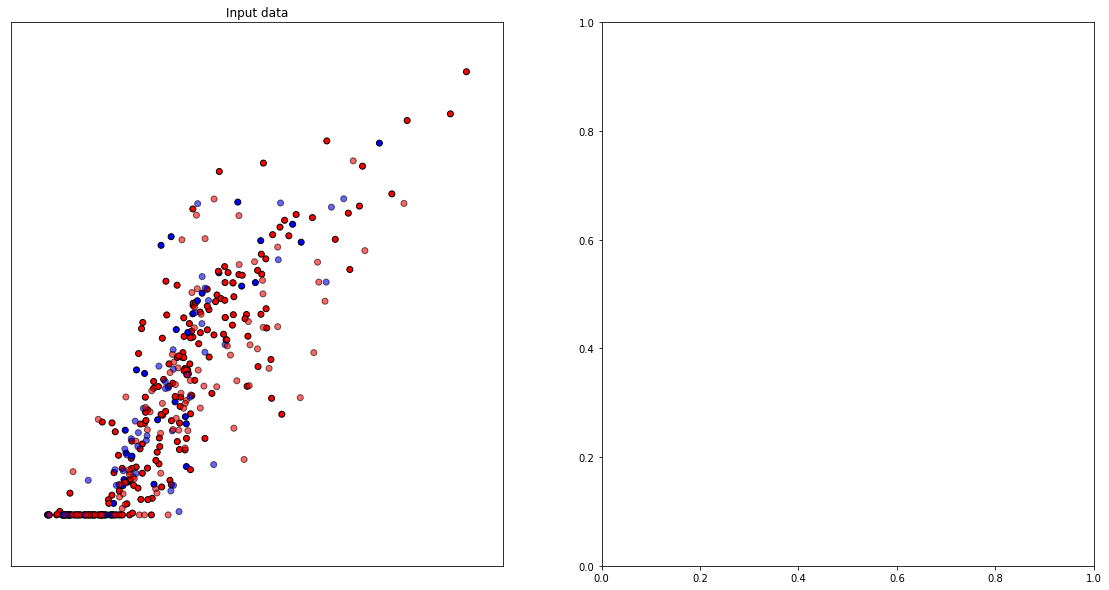

In [90]:
# credit cards
cc_plot_df = cc_df.copy(deep=True)
cc_plot_features = ['Limit', 'Balance']
cc_plot_results = ['Cards']

X_cc_plot = cc_plot_df[cc_plot_features].to_numpy()
y_cc_plot = cc_plot_df[cc_plot_results].to_numpy().ravel()

cc_dataset = (X_cc_plot, y_cc_plot)
draw_plot(cc_plot_df, cc_dataset, cc_plot_features, cc_plot_results)